In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import activations, regularizers
from keras.layers import Dense, Input, Concatenate, Dropout, LSTM
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
tf.executing_eagerly()

True

In [3]:
X_train =  np.load('train_images.npy', allow_pickle=True)
y_train =  np.load('train_labels.npy', allow_pickle=True)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

This is a T-shirt/top


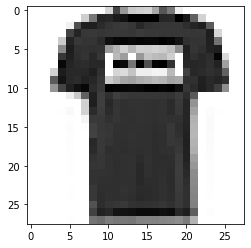

In [5]:
# show image
data_idx = 1
plt.imshow(X_train[data_idx,:,:]/255, cmap='binary')
class_number = y_train[data_idx]
class_text = class_names[class_number]
print(f'This is a {class_text}')

In [6]:
# data prep
X_train = X_train/255
X_train = X_train.reshape(-1, 784)
y_train_ohe = np.zeros((68000, 10))

In [7]:
for count, row in enumerate(y_train_ohe):
    row[y_train[count]] = 1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_ohe, test_size=0.2, random_state=101)
# y_train = y_train_ohe

In [49]:
input_layer = Input(shape=(784,))
first_hidden_layer = Dense(512, activation="relu")(input_layer)
first_hidden_layer_d = Dropout(0.2)(first_hidden_layer)
second_hidden_layer = Dense(256, activation="relu")(first_hidden_layer_d)
second_hidden_layer_d = Dropout(0.2)(second_hidden_layer)
third_hidden_layer = Dense(128, activation="relu")(second_hidden_layer)
third_hidden_layer_d = Dropout(0.2)(third_hidden_layer)
fourth_hidden_layer = Dense(56, activation="relu")(third_hidden_layer_d)
output_layer = Dense(10, activation="softmax")(fourth_hidden_layer)

my_model = Model(inputs=input_layer, outputs=output_layer)
my_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy") # Best optimizer = "adam", Multi-Class Classification loss allways "categorical_crossentropy"
hist = my_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=[X_test, y_test])


Epoch 1/20
850/850 [==============================] - 15s 17ms/step - loss: 0.5686 - accuracy: 0.7922 - val_loss: 0.4273 - val_accuracy: 0.8399
Epoch 2/20
850/850 [==============================] - 14s 17ms/step - loss: 0.4213 - accuracy: 0.8465 - val_loss: 0.3722 - val_accuracy: 0.8624
Epoch 3/20
850/850 [==============================] - 14s 17ms/step - loss: 0.3781 - accuracy: 0.8620 - val_loss: 0.3750 - val_accuracy: 0.8610
Epoch 4/20
850/850 [==============================] - 14s 16ms/step - loss: 0.3593 - accuracy: 0.8686 - val_loss: 0.3389 - val_accuracy: 0.8750
Epoch 5/20
850/850 [==============================] - 14s 17ms/step - loss: 0.3369 - accuracy: 0.8757 - val_loss: 0.3400 - val_accuracy: 0.8754
Epoch 6/20
850/850 [==============================] - 14s 16ms/step - loss: 0.3202 - accuracy: 0.8813 - val_loss: 0.3213 - val_accuracy: 0.8805
Epoch 7/20
850/850 [==============================] - 9s 10ms/step - loss: 0.3154 - accuracy: 0.8838 - val_loss: 0.3259 - val_accuracy: 

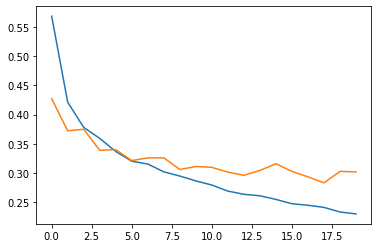

In [50]:
plt.plot(hist.history["loss"][:])
plt.plot(hist.history["val_loss"][:])

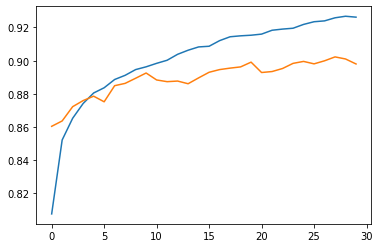

In [25]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

In [27]:
X_val = np.load('val_images.npy', allow_pickle=True)
X_val = X_val/255
X_val = X_val.reshape(-1,784)
prediction = my_model.predict(X_val)
print(f'Multi-Class Classification: {prediction}')
my_predictions = np.argmax(prediction, axis=1)
my_name = 'Eivind'
np.save(f'{my_name}_predictions.npy', my_predictions)

63/63 [==============================] - 0s 3ms/step
Multi-Class Classification: [[1.02710603e-02 4.31238848e-04 5.06605208e-01 ... 1.54877455e-07
  3.35630449e-03 6.91825960e-07]
 [9.59498510e-02 1.23410085e-02 1.02730997e-01 ... 5.57879801e-04
  7.73887336e-02 5.69986994e-04]
 [2.15958698e-06 5.38906022e-07 6.69557096e-07 ... 7.87512004e-01
  1.29445177e-03 2.10652590e-01]
 ...
 [1.72149241e-02 2.31608227e-02 2.59443931e-03 ... 3.58651135e-07
  5.47046424e-04 8.21344315e-07]
 [3.30459846e-15 3.44950171e-16 5.00767361e-16 ... 6.63687766e-04
  1.16473020e-11 9.99316096e-01]
 [2.83657176e-35 0.00000000e+00 0.00000000e+00 ... 8.07603735e-23
  3.23441056e-31 1.50737252e-26]]
